In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [2]:
df= pd.read_csv("with_sin_cos_all_nan_removed.csv")

In [3]:
df

,lat,lon,time,ALBDO_L1_Avg_1,DLWRF_L1_Avg_1,DSWRF_L1_Avg_1,GUST_L1,HPBL_L1,LHTFL_L1_Avg_1,PRES_L1,...,ULWRF_L1_Avg_1,USWRF_L1_Avg_1,V_GRD_L103,VIS_L1,Station Name,PM 2.5,AOD,PRATE_L1_Avg_1,sin_month,cos_month
0,22.630,88.352,2021-01-01,5.98142,312.559000,204.350000,3.826027,301.986018,30.057888,101429.166812,...,421.298931,24.68100,-3.067933,24135.001953,Belur Math,77.654583,0.581550,0.000000e+00,0.500000,0.866025
1,22.630,88.352,2021-01-02,5.97004,313.683534,202.960000,3.101588,267.144669,30.471104,101373.725500,...,422.392632,24.65800,-2.350824,24135.046875,Belur Math,58.124737,0.425139,0.000000e+00,0.500000,0.866025
2,22.630,88.352,2021-01-03,5.93766,322.803813,195.740000,2.774223,262.226417,28.723234,101257.671000,...,425.339199,23.57400,-2.127140,24135.080078,Belur Math,NaN,0.665841,0.000000e+00,0.500000,0.866025
3,22.630,88.352,2021-01-04,5.91420,333.227000,202.500000,2.184178,245.017254,29.531700,101243.457063,...,432.330161,24.27400,-1.479325,24134.914062,Belur Math,76.667778,0.415729,0.000000e+00,0.500000,0.866025
4,22.630,88.352,2021-01-05,5.89578,342.897000,200.550000,2.317436,244.012100,30.009221,101231.065125,...,439.300757,24.09300,-0.909857,24134.949219,Belur Math,92.684583,0.384968,0.000000e+00,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725,22.545,88.340,2023-08-27,11.06430,447.360698,218.351436,4.011113,509.447365,121.838930,100109.151406,...,480.649783,21.86660,1.165340,24134.960938,Victoria,40.327917,0.810233,3.322000e-06,-0.866025,-0.500000
9726,22.545,88.340,2023-08-28,11.38305,446.798837,254.572562,3.222736,348.428543,132.334216,100105.622344,...,491.225494,25.90458,0.574886,24134.876953,Victoria,60.819167,0.810233,0.000000e+00,-0.866025,-0.500000
9727,22.545,88.340,2023-08-29,11.53260,449.412098,170.017404,2.810299,586.165287,94.150990,100182.874219,...,486.897797,17.79536,0.228833,24135.013672,Victoria,70.484583,0.810233,1.620000e-07,-0.866025,-0.500000
9728,22.545,88.340,2023-08-30,11.89660,444.362351,238.533522,2.842451,508.752148,110.109848,100287.627813,...,494.799905,25.23142,0.528769,24134.886719,Victoria,68.857619,0.810233,4.600000e-08,-0.866025,-0.500000


In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:

# Assuming your data is in a pandas DataFrame named 'df'
# Make sure your 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])

# Filter data for dates between January 1, 2021, and December 31, 2022
date_range_start = '2021-01-01'
date_range_end = '2022-10-31'
date_mask = (df['time'] >= date_range_start) & (df['time'] <= date_range_end)
filtered_data = df[date_mask]

# Further filter based on 'PM 2.5' range
pm_mask = (filtered_data['PM 2.5'] >= 30) & (filtered_data['PM 2.5'] <= 250)
final_filtered_data = filtered_data[pm_mask]

# Create a new DataFrame with the filtered data
new_df = pd.DataFrame(final_filtered_data)

# Display the new DataFrame
print(new_df)


         lat     lon       time  ALBDO_L1_Avg_1  DLWRF_L1_Avg_1  \
0     22.630  88.352 2021-01-01         5.98142      312.559000   
1     22.630  88.352 2021-01-02         5.97004      313.683534   
3     22.630  88.352 2021-01-04         5.91420      333.227000   
4     22.630  88.352 2021-01-05         5.89578      342.897000   
5     22.630  88.352 2021-01-06         5.86226      355.172000   
...      ...     ...        ...             ...             ...   
9421  22.545  88.340 2022-10-27         5.51090      387.367951   
9422  22.545  88.340 2022-10-28         5.53700      365.774081   
9423  22.545  88.340 2022-10-29         5.57065      357.883842   
9424  22.545  88.340 2022-10-30         5.52930      368.781286   
9425  22.545  88.340 2022-10-31         5.51135      381.682670   

      DSWRF_L1_Avg_1   GUST_L1     HPBL_L1  LHTFL_L1_Avg_1        PRES_L1  \
0         204.350000  3.826027  301.986018       30.057888  101429.166812   
1         202.960000  3.101588  267.14466

In [6]:
new_df = new_df.drop(['Station Name'], axis=1)

In [7]:
# Remove rows with NaN values
new_df= new_df.dropna()

In [8]:
new_df

,lat,lon,time,ALBDO_L1_Avg_1,DLWRF_L1_Avg_1,DSWRF_L1_Avg_1,GUST_L1,HPBL_L1,LHTFL_L1_Avg_1,PRES_L1,...,U_GRD_L103,ULWRF_L1_Avg_1,USWRF_L1_Avg_1,V_GRD_L103,VIS_L1,PM 2.5,AOD,PRATE_L1_Avg_1,sin_month,cos_month
0,22.630,88.352,2021-01-01,5.98142,312.559000,204.350000,3.826027,301.986018,30.057888,101429.166812,...,0.177358,421.298931,24.68100,-3.067933,24135.001953,77.654583,0.581550,0.000000e+00,0.500000,0.866025
1,22.630,88.352,2021-01-02,5.97004,313.683534,202.960000,3.101588,267.144669,30.471104,101373.725500,...,0.641507,422.392632,24.65800,-2.350824,24135.046875,58.124737,0.425139,0.000000e+00,0.500000,0.866025
3,22.630,88.352,2021-01-04,5.91420,333.227000,202.500000,2.184178,245.017254,29.531700,101243.457063,...,-0.406643,432.330161,24.27400,-1.479325,24134.914062,76.667778,0.415729,0.000000e+00,0.500000,0.866025
4,22.630,88.352,2021-01-05,5.89578,342.897000,200.550000,2.317436,244.012100,30.009221,101231.065125,...,-0.299777,439.300757,24.09300,-0.909857,24134.949219,92.684583,0.384968,0.000000e+00,0.500000,0.866025
5,22.630,88.352,2021-01-06,5.86226,355.172000,198.774000,2.081998,263.980614,28.888099,101035.096312,...,1.169065,452.033445,23.77400,-0.265803,24134.955078,132.424348,0.372209,0.000000e+00,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,22.545,88.340,2022-10-27,5.51090,387.367951,241.231506,3.132421,503.458798,108.617792,101104.542188,...,0.485902,458.164871,26.95872,-2.057831,24135.027344,80.367500,0.626761,2.592000e-07,-0.866025,0.500000
9422,22.545,88.340,2022-10-28,5.53700,365.774081,242.019029,3.987402,516.023991,114.005835,101077.089219,...,0.612023,448.190504,27.22984,-2.753777,24134.859375,131.778182,0.505019,0.000000e+00,-0.866025,0.500000
9423,22.545,88.340,2022-10-29,5.57065,357.883842,242.896400,3.682288,455.986360,104.822242,101086.728281,...,0.829908,443.602007,27.48108,-2.624502,24134.949219,92.163750,0.365903,0.000000e+00,-0.866025,0.500000
9424,22.545,88.340,2022-10-30,5.52930,368.781286,238.121404,3.500823,443.179462,98.108788,101057.873594,...,0.875906,448.558088,26.72044,-2.584768,24134.914062,77.895000,0.344250,0.000000e+00,-0.866025,0.500000


In [9]:
# high_pm= df[df['PM 2.5']>30]

In [10]:
# high_pm

In [11]:
# Assuming your DataFrame is named 'df'
X = new_df.drop(['PM 2.5',"time"], axis=1)  # Features (excluding the target variable)
y = new_df['PM 2.5']  # Target variable


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
#print(X_test.dtypes)

Gradient Boosting RMSE: 16.3041
Gradient Boosting R-squared: 0.8468


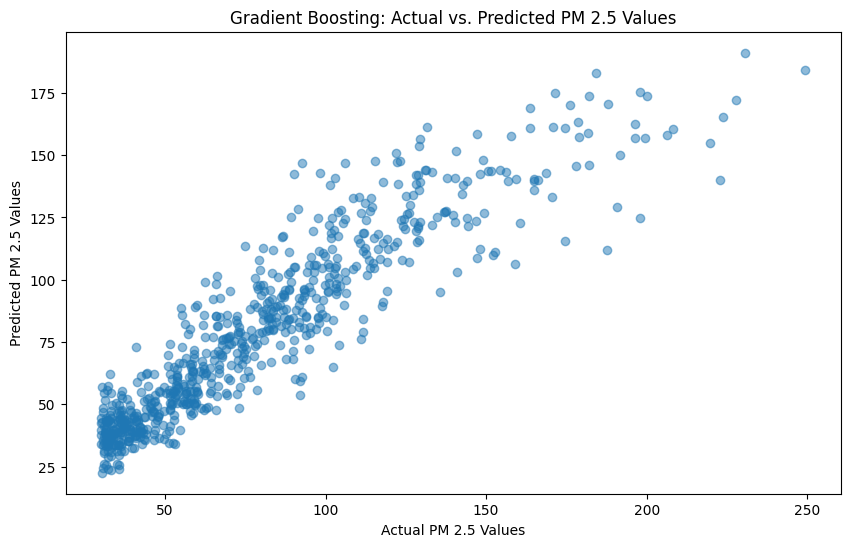

In [14]:


# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting RMSE: {rmse_gb:.4f}')
print(f'Gradient Boosting R-squared: {r2_gb:.4f}')

# Plot the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.xlabel('Actual PM 2.5 Values')
plt.ylabel('Predicted PM 2.5 Values')
plt.title('Gradient Boosting: Actual vs. Predicted PM 2.5 Values')
plt.show()





In [15]:
from sklearn.model_selection import cross_val_score


# Assuming rf_model is your Random Forest model
cross_val_scores = cross_val_score(gb_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_cross_val = np.sqrt(-cross_val_scores.mean())

print(f'Cross-Validated RMSE: {rmse_cross_val:.4f}')


Cross-Validated RMSE: 15.6986


In [16]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)


DLWRF_L1_Avg_1    0.419962
lat               0.170508
R_H_L103          0.098166
LHTFL_L1_Avg_1    0.069174
AOD               0.032895
GUST_L1           0.032220
V_GRD_L103        0.030103
ALBDO_L1_Avg_1    0.020033
DSWRF_L1_Avg_1    0.019465
TMP_L103          0.018511
cos_month         0.018405
HPBL_L1           0.017660
lon               0.012603
PRES_L1           0.009650
VIS_L1            0.009475
SHTFL_L1_Avg_1    0.006612
U_GRD_L103        0.005624
ULWRF_L1_Avg_1    0.004253
USWRF_L1_Avg_1    0.003592
PRATE_L1_Avg_1    0.001008
sin_month         0.000081
dtype: float64


In [18]:
from sklearn.metrics import mean_squared_error, r2_score


# Make predictions on the training set
y_train_pred = gb_model.predict(X_train)

# Make predictions on the test set
y_test_pred = gb_model.predict(X_test)

# Calculate RMSE for training and testing sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R-squared for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display the results
print(f'Training RMSE: {rmse_train:.4f}')
print(f'Testing RMSE: {rmse_test:.4f}')

print(f'Training R-squared: {r2_train:.4f}')
print(f'Testing R-squared: {r2_test:.4f}')



Training RMSE: 10.6235
Testing RMSE: 16.3041
Training R-squared: 0.9286
Testing R-squared: 0.8468


In [19]:
import joblib

# Save the model to a file
model_filename = 'gradient_boost_model_20_12.pkl'
joblib.dump(gb_model, model_filename)



['gradient_boost_model_20_12.pkl']

ready unseen data

In [20]:
df1= pd.read_csv("with_sin_cos_all_nan_removed.csv")

In [21]:
# df['time'] = pd.to_datetime(df['time'])

In [22]:
import pandas as pd

# Assuming your data is in a pandas DataFrame named 'df'
# Make sure your 'time' column is in datetime format
df1['time'] = pd.to_datetime(df1['time'])

# Filter data for dates between January 1, 2021, and December 31, 2022
date_range_start = '2022-11-01'
date_range_end = '2022-12-31'
date_mask = (df1['time'] >= date_range_start) & (df1['time'] <= date_range_end)
filtered_data = df1[date_mask]

# Further filter based on 'PM 2.5' range
pm_mask = (filtered_data['PM 2.5'] >= 30) & (filtered_data['PM 2.5'] <= 250)
final_filtered_data = filtered_data

# Create a new DataFrame with the filtered data
new_df1 = pd.DataFrame(final_filtered_data)

# Display the new DataFrame
print(new_df1)



         lat     lon       time  ALBDO_L1_Avg_1  DLWRF_L1_Avg_1  \
669   22.630  88.352 2022-11-01         5.52626      388.186467   
670   22.630  88.352 2022-11-02         5.52726      388.849215   
671   22.630  88.352 2022-11-03         5.66760      362.557424   
672   22.630  88.352 2022-11-04         5.63020      358.548452   
673   22.630  88.352 2022-11-05         5.63416      360.586688   
...      ...     ...        ...             ...             ...   
9482  22.545  88.340 2022-12-27         5.61565      361.617300   
9483  22.545  88.340 2022-12-28         5.65195      337.161187   
9484  22.545  88.340 2022-12-29         5.74805      307.254359   
9485  22.545  88.340 2022-12-30         5.71075      314.481768   
9486  22.545  88.340 2022-12-31         5.71550      322.851497   

      DSWRF_L1_Avg_1   GUST_L1     HPBL_L1  LHTFL_L1_Avg_1        PRES_L1  \
669       228.648278  3.342449  359.959933      107.123616  101120.672187   
670       227.620078  3.938785  398.31849

In [23]:
new_df1= new_df1.dropna()

In [24]:
X_unseen = new_df1.drop(['PM 2.5','Station Name',"time"], axis=1)  # Features (excluding the target variable)

In [25]:
# Later, when you want to use the model for predictions on unseen data:
# Load the model from the file
import joblib
loaded_model = joblib.load(model_filename)

#Make predictions on unseen data (replace X_unseen with your actual unseen data)
y_unseen_pred = loaded_model.predict(X_unseen)

#Display the predictions on unseen data
print(y_unseen_pred)
pm=(new_df1["PM 2.5"])
print(pm)


[ 71.87511732  71.17052284  95.00075937  83.45006649  85.2861527
  75.69191184 101.5136389   75.86216282  97.68546802  70.61053712
  93.2486598  108.6856094  113.82524103 101.49361567  82.06238545
 108.72275337  98.63070826  83.43193887  86.89923484  75.67612006
  82.84316141  94.2947321  103.94721694  91.58061023  98.40851734
 103.89115404 102.00890076  97.06299378  89.49410395  80.15598661
  84.15309706 121.96478981 110.00056683 115.52464148 123.55187531
 119.70667635 137.62017953 110.07014781 104.61841961 100.04909707
 122.375835   134.32934096 122.40384924 132.10554292 106.0774878
 109.87846557 125.27052165 117.72832682 109.83817982 115.07907348
 124.88589938 121.98213649 122.88777976 129.66298026 109.04954977
 111.22357243 106.56809244 114.41999911 123.51495325 132.84407111
 143.44688575  84.82216284 149.64254588 147.45596214 131.10955863
 130.82638638 147.38767418 116.74707569 144.41293775 124.03259907
 143.39928687 140.06680826 176.42901442 163.91396072 150.24479589
 165.9757237

In [26]:
rmse = np.sqrt(mean_squared_error(y_unseen_pred, pm))

In [27]:
rmse

30.869487992348056

In [28]:
r2_unseen = r2_score(y_unseen_pred, pm)

In [29]:
r2_unseen

0.22090243162755097

In [30]:
import numpy as np

# Assuming y_unseen_pred and pm_actual are your predicted and actual PM 2.5 values
correlation_coefficient = np.corrcoef(y_unseen_pred, pm)[0, 1]

print(f'Correlation coefficient between predicted and actual PM 2.5: {correlation_coefficient:.4f}')


Correlation coefficient between predicted and actual PM 2.5: 0.6801


In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_actual and y_pred are your actual and predicted values
y_actual_tttt = np.array([pm])  # Replace with your actual values
y_pred_tttt = np.array([y_unseen_pred])  # Replace with your predicted values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_actual_tttt, y_pred_tttt))

# Calculate the mean of the target variable
mean_target = np.mean(y_actual_tttt)

# Compare RMSE with Mean
print(f'RMSE: {rmse:.4f}')
print(f'Mean of the Target Variable: {mean_target:.4f}')

# Normalize RMSE by dividing by the mean
nrmse = rmse / mean_target
print(f'Normalized RMSE (NRMSE): {nrmse:.4f}')


RMSE: 30.8695
Mean of the Target Variable: 107.1902
Normalized RMSE (NRMSE): 0.2880


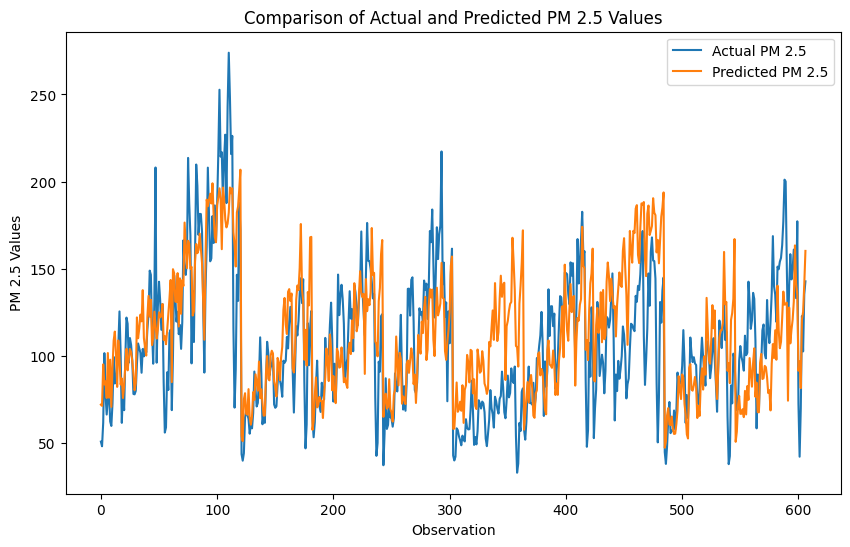

In [33]:
import matplotlib.pyplot as plt


# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(y_actual_tttt.flatten(), label='Actual PM 2.5')
plt.plot(y_pred_tttt.flatten(), label='Predicted PM 2.5')

# Add labels and title
plt.xlabel('Observation')
plt.ylabel('PM 2.5 Values')
plt.title('Comparison of Actual and Predicted PM 2.5 Values')

# Add legend
plt.legend()

# Show the plot
plt.show()
